In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirtoryname, _, filenames in os.walk('dat/input'):
    for filename in filenames:
        print(os.path.join(dirtoryname, filename))

In [ ]:
# Load the data
data = pd.read_csv('/content/Medicine_De (1).csv')

# Display the first few rows of the dataframe
data.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Basic statistics
basic_stats = data.describe()

missing_values, basic_stats

(Medicine Name         0
 Composition           0
 Uses                  0
 Side_effects          0
 Image URL             1
 Manufacturer          0
 Excellent Review %    0
 Average Review %      0
 Poor Review %         0
 dtype: int64,
        Excellent Review %  Average Review %  Poor Review %
 count        11826.000000      11826.000000   11826.000000
 mean            38.518434         35.754439      25.727127
 std             25.225636         18.268560      23.991028
 min              0.000000          0.000000       0.000000
 25%             22.000000         27.000000       0.000000
 50%             34.000000         35.000000      22.000000
 75%             51.000000         47.000000      35.000000
 max            100.000000         88.000000     100.000000)

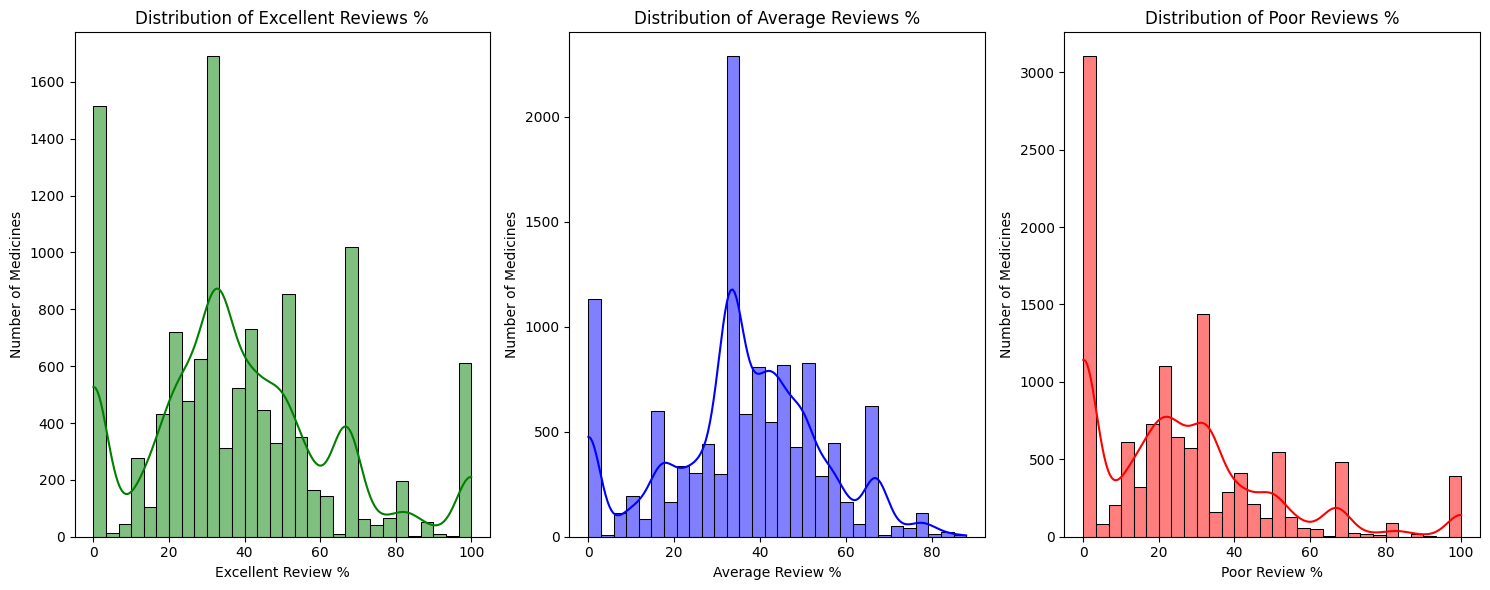

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a size of 15x6 inches
plt.figure(figsize=(15, 6))

# Plotting the distribution of Excellent Reviews %
plt.subplot(1, 3, 1)
sns.histplot(data['Excellent Review %'], bins=30, kde=True, color='green')
plt.title('Distribution of Excellent Reviews %')
plt.xlabel('Excellent Review %')
plt.ylabel('Number of Medicines')

# Plotting the distribution of Average Reviews %
plt.subplot(1, 3, 2)
sns.histplot(data['Average Review %'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Reviews %')
plt.xlabel('Average Review %')
plt.ylabel('Number of Medicines')

# Plotting the distribution of Poor Reviews %
plt.subplot(1, 3, 3)
sns.histplot(data['Poor Review %'], bins=30, kde=True, color='red')
plt.title('Distribution of Poor Reviews %')
plt.xlabel('Poor Review %')
plt.ylabel('Number of Medicines')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


<ipython-input-55-477fb2d114cb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_manufacturers.index, x=top_manufacturers.values, palette="viridis")


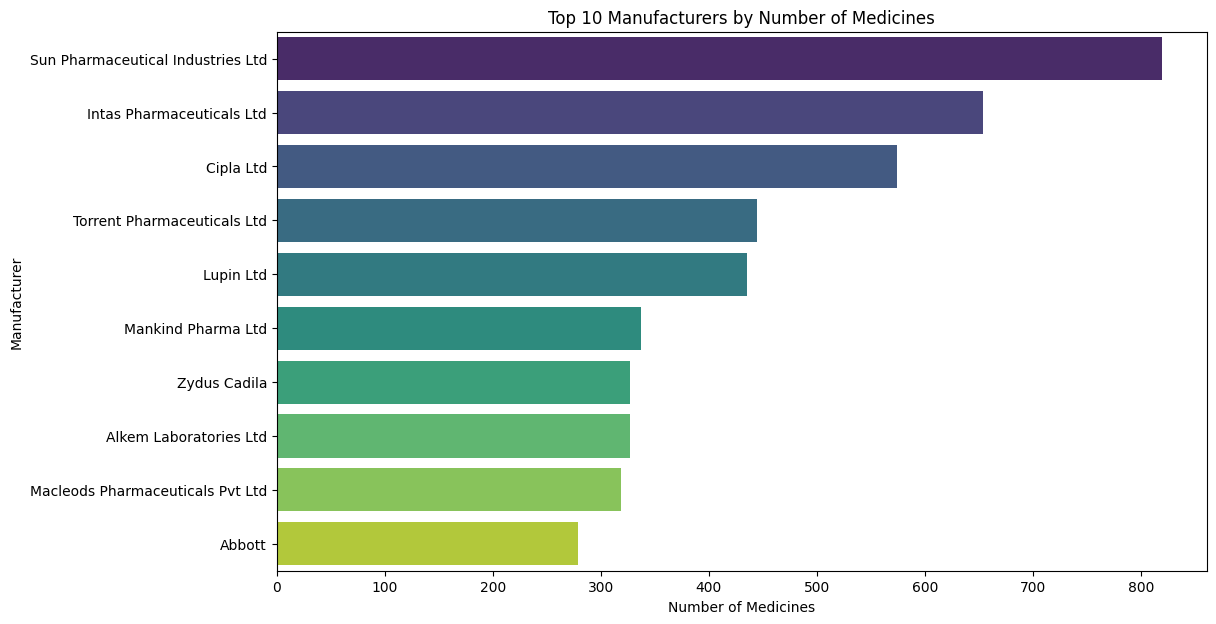

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 manufacturers by number of medicines
top_manufacturers = data['Manufacturer'].value_counts().head(10)

# Create a figure with a size of 12x7 inches
plt.figure(figsize=(12, 7))

# Plotting a bar plot
sns.barplot(y=top_manufacturers.index, x=top_manufacturers.values, palette="viridis")

# Adding title and labels
plt.title('Top 10 Manufacturers by Number of Medicines')
plt.xlabel('Number of Medicines')
plt.ylabel('Manufacturer')

# Display the plot
plt.show()


In [ ]:
# Identify the top 10 medicines with the highest percentage of excellent reviews
top_excellent_reviews = data.nlargest(10, 'Excellent Review %')[['Medicine Name', 'Excellent Review %']]

# Display the result
top_excellent_reviews


,Medicine Name,Excellent Review %
257,Atormac CV10 Capsule,100
258,Alphadol 0.25mcg Capsule,100
437,Atorva 5,100
444,Azapure,100
510,Alides 5mg,100
512,Azenam 1gm,100
515,Abhayrab-PF Vaccine,100
575,Azithral 500mg,100
590,Atropine Sulphate 1% Eye Ointment,100
598,ATR-F,100


In [ ]:
# Identify the top 10 medicines with the highest percentage of average reviews
top_average_reviews = data.nlargest(10, 'Average Review %')[['Medicine Name', 'Average Review %']]

# Display the result
top_average_reviews


,Medicine Name,Average Review %
4055,K-Cit Oral Solution,88
4827,Livoluk Oral Solution,88
795,Adnurve SR,87
2945,GB 29 Plus,87
3664,Itaspor 200 Capsule,87
5861,Metzok 12.5 PR,87
6595,Nebula-D SR,87
6675,Novonorm 2mg,87
9083,Sevcar 400,87
7520,Preva Gold 10 Capsule,86


In [ ]:
# Identify the top 10 medicines with the highest percentage of poor reviews
top_poor_reviews = data.nlargest(10, 'Poor Review %')[['Medicine Name', 'Poor Review %']]

# Display the result
top_poor_reviews


,Medicine Name,Poor Review %
24,Aricep 10,100
308,Altonil 5 MD,100
412,Avas 40,100
483,Albutamol Neo Syrup,100
504,Altiva 120mg,100
564,Amclaid 625,100
588,Aziwok-XL 200 Liquid,100
595,Apresol Plus,100
603,Aggramed 5mg Infusion,100
629,Advent Forte 457mg Syrup Tangy Orange,100


<ipython-input-59-5315ca187441>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_compositions.index, x=top_compositions.values, palette="magma")


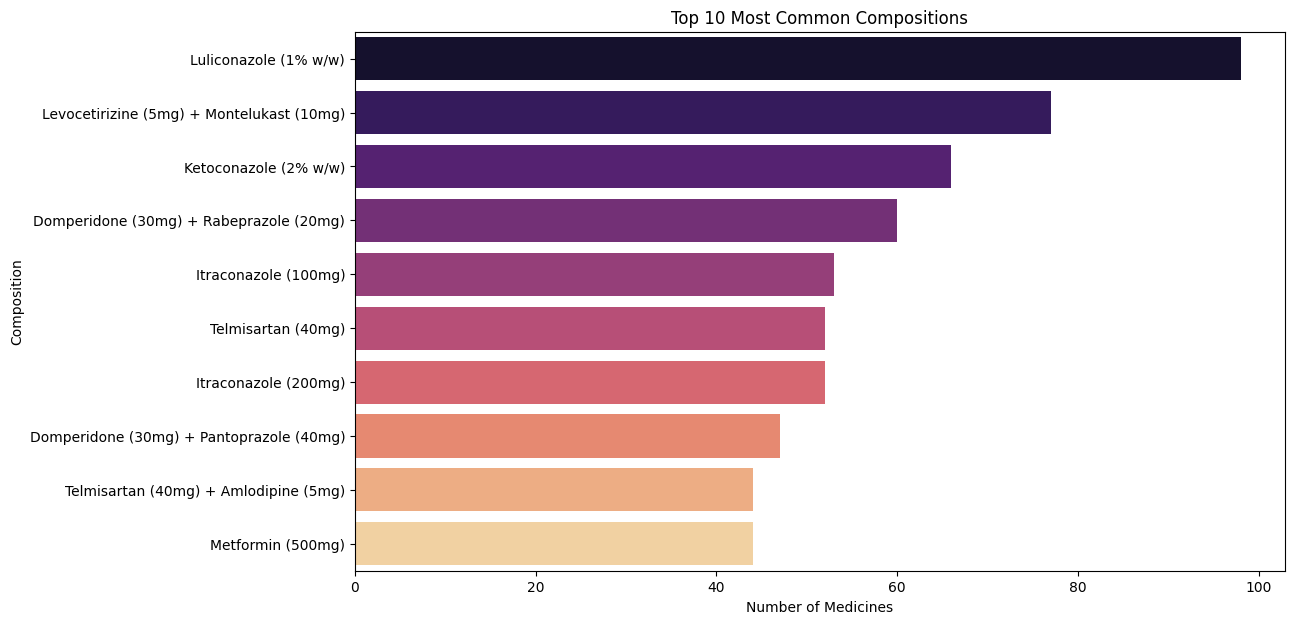

In [ ]:
# Identify the top 10 most common compositions
top_compositions = data['Composition'].value_counts().head(10)

# Create a figure with a size of 12x7 inches
plt.figure(figsize=(12, 7))

# Plotting a bar plot
sns.barplot(y=top_compositions.index, x=top_compositions.values, palette="magma")

# Adding title and labels
plt.title('Top 10 Most Common Compositions')
plt.xlabel('Number of Medicines')
plt.ylabel('Composition')

# Display the plot
plt.show()


<ipython-input-60-12d0ff4df98e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=uses.index, x=uses.values, palette="cubehelix")


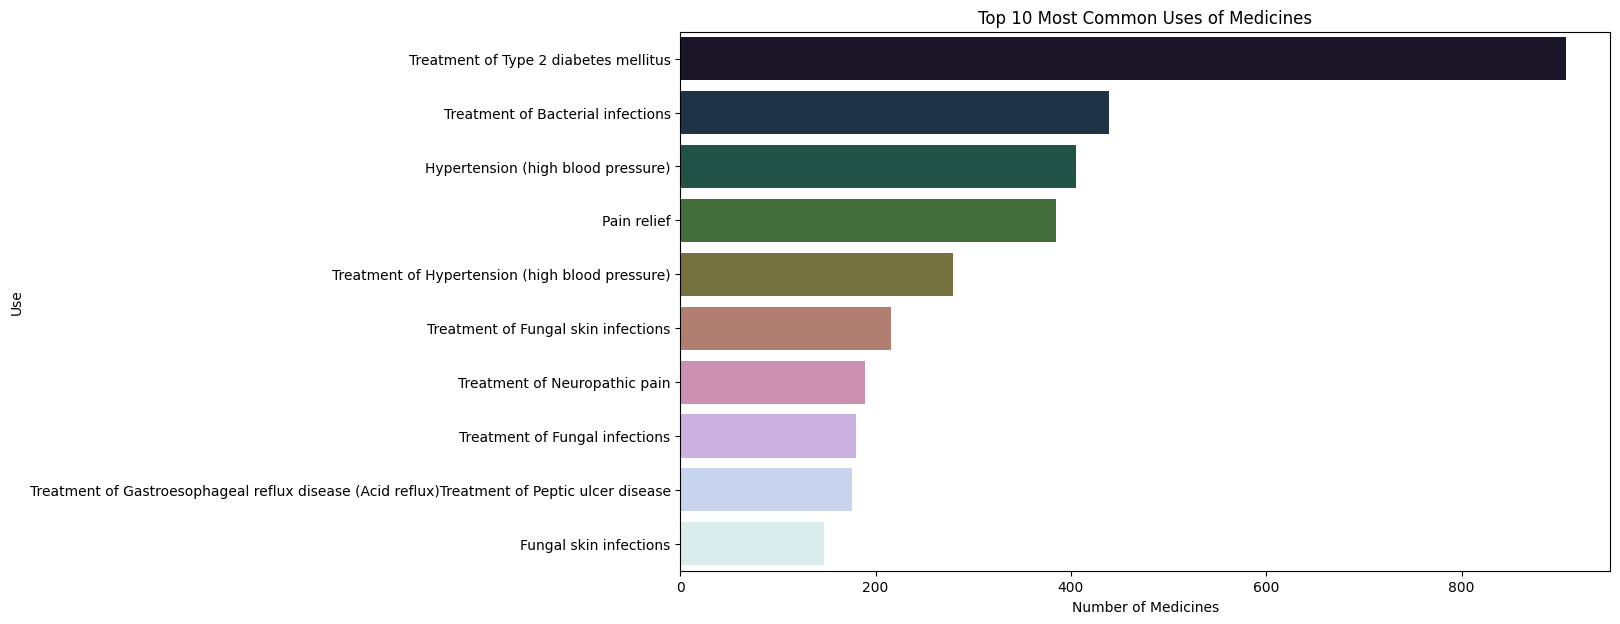

In [ ]:
# Splitting the uses and counting the occurrences
uses = data['Uses'].str.split(',').explode().str.strip().value_counts().head(10)

# Create a figure with a size of 12x7 inches
plt.figure(figsize=(12, 7))

# Plotting a bar plot
sns.barplot(y=uses.index, x=uses.values, palette="cubehelix")

# Adding title and labels
plt.title('Top 10 Most Common Uses of Medicines')
plt.xlabel('Number of Medicines')
plt.ylabel('Use')

# Display the plot
plt.show()


<ipython-input-61-772220e7fcca>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=side_effects.index, x=side_effects.values, palette="coolwarm")


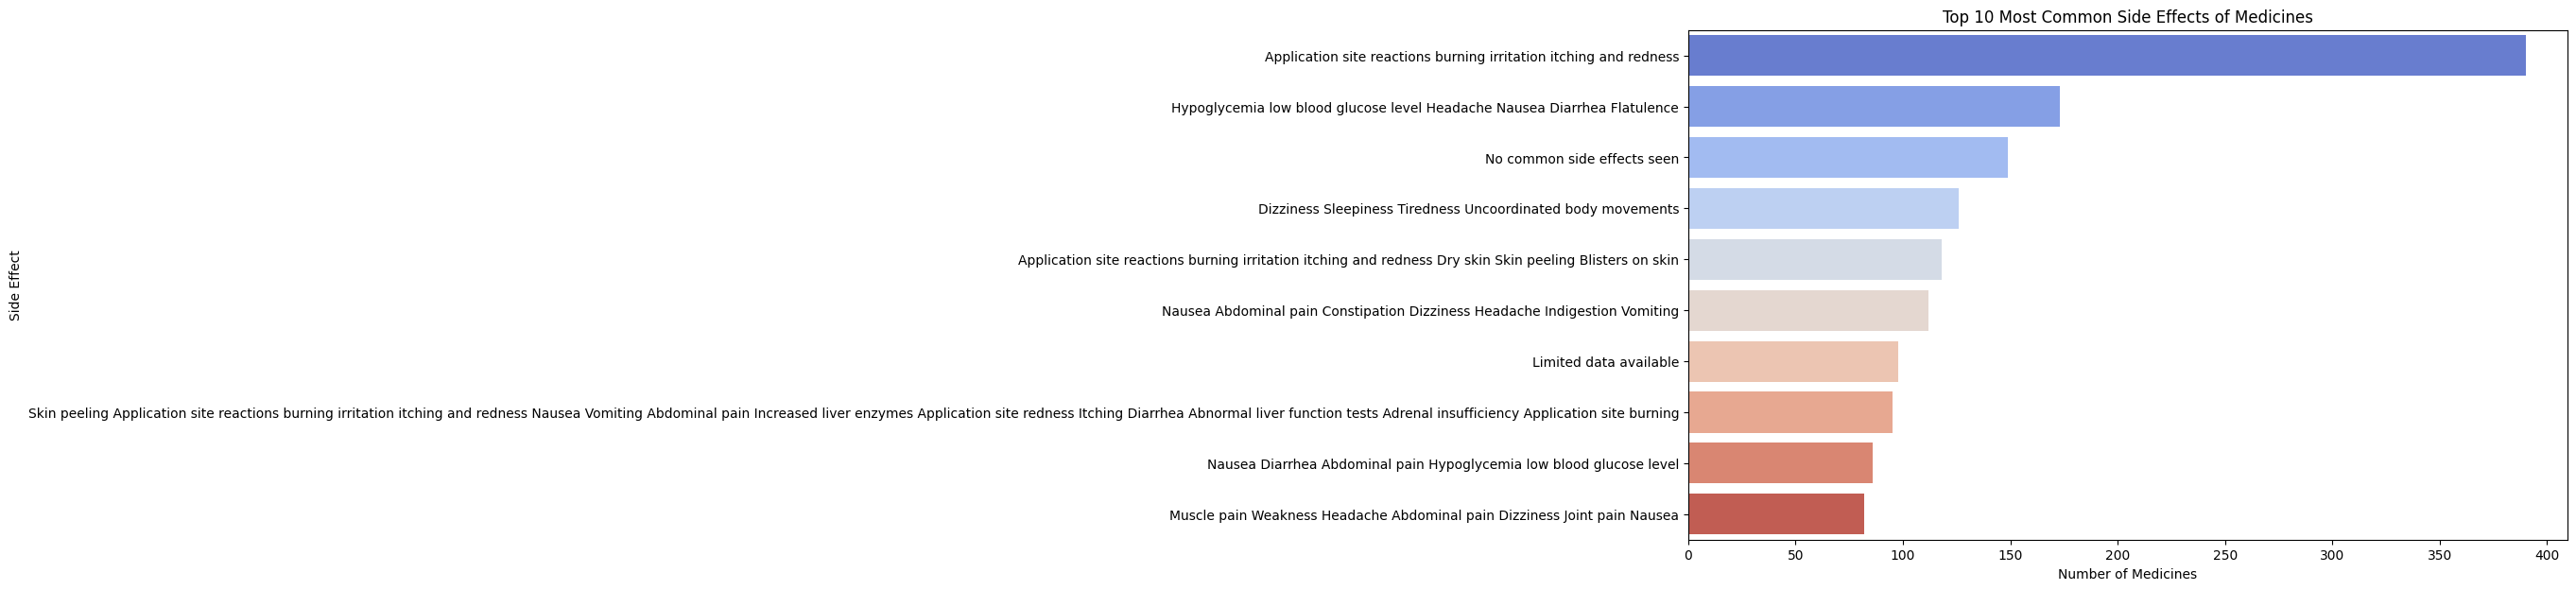

In [ ]:
# Splitting the side effects and counting the occurrences
side_effects = data['Side_effects'].str.split(',').explode().str.strip().value_counts().head(10)

# Create a figure with a size of 12x7 inches
plt.figure(figsize=(12, 7))

# Plotting a bar plot
sns.barplot(y=side_effects.index, x=side_effects.values, palette="coolwarm")

# Adding title and labels
plt.title('Top 10 Most Common Side Effects of Medicines')
plt.xlabel('Number of Medicines')
plt.ylabel('Side Effect')

# Display the plot
plt.show()


In [ ]:
# Selecting top manufacturers by number of medicines they produce
top_manufacturers_list = top_manufacturers.index.tolist()

# Filtering data for these manufacturers and calculating their average review ratings
manufacturer_avg_reviews = data[data['Manufacturer'].isin(top_manufacturers_list)].groupby('Manufacturer')[['Excellent Review %', 'Average Review %', 'Poor Review %']].mean()

<ipython-input-63-af31f28e983d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=manufacturer_avg_reviews_sorted.index, x=manufacturer_avg_reviews_sorted['Excellent Review %'], palette="Blues_d")


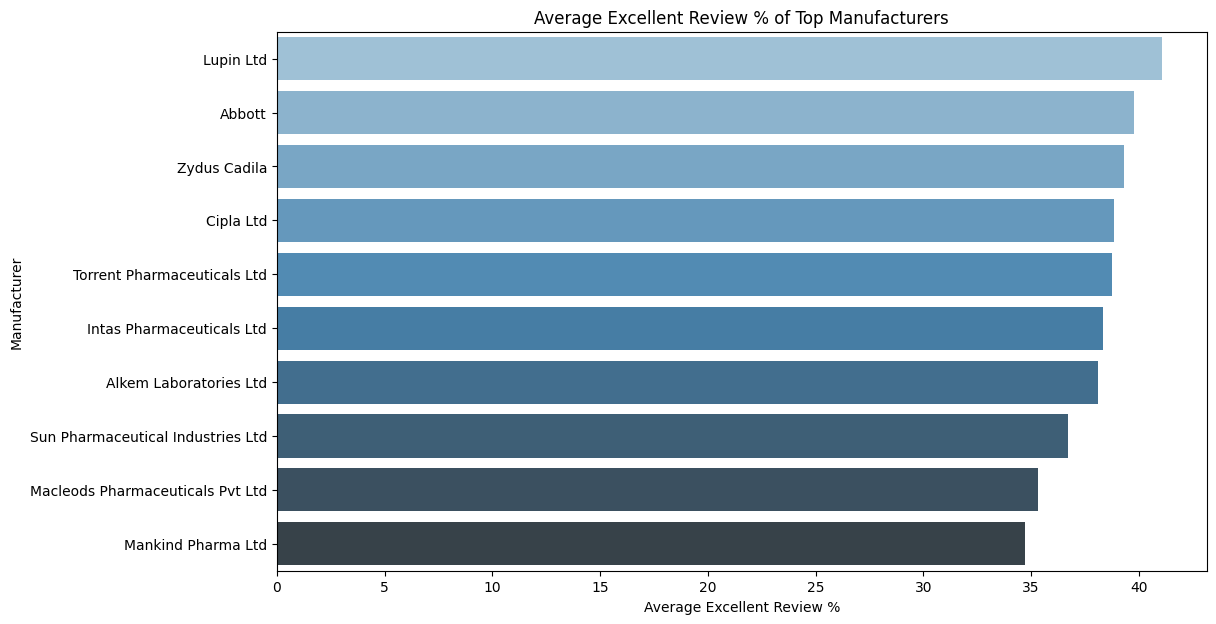

In [ ]:
# Sorting manufacturers by the average of Excellent Review %
manufacturer_avg_reviews_sorted = manufacturer_avg_reviews.sort_values(by='Excellent Review %', ascending=False)

# Create a figure with a size of 12x7 inches
plt.figure(figsize=(12, 7))

# Plotting a bar plot
sns.barplot(y=manufacturer_avg_reviews_sorted.index, x=manufacturer_avg_reviews_sorted['Excellent Review %'], palette="Blues_d")

# Adding title and labels
plt.title('Average Excellent Review % of Top Manufacturers')
plt.xlabel('Average Excellent Review %')
plt.ylabel('Manufacturer')

# Display the plot
plt.show()


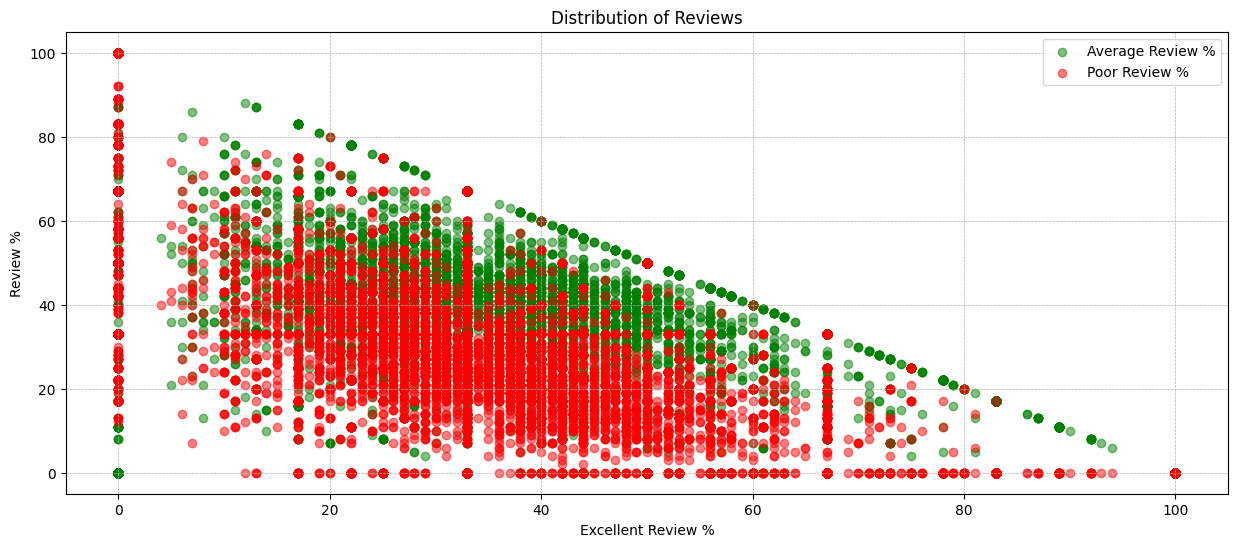

In [ ]:
# Create a figure with a size of 15x6 inches
plt.figure(figsize=(15, 6))

# Scatter plot to visually depict the distribution
plt.scatter(data['Excellent Review %'], data['Average Review %'], color='green', label='Average Review %', alpha=0.5)
plt.scatter(data['Excellent Review %'], data['Poor Review %'], color='red', label='Poor Review %', alpha=0.5)

# Set title and axis labels
plt.title('Distribution of Reviews')
plt.xlabel('Excellent Review %')
plt.ylabel('Review %')

# Display legend, grid, and plot
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


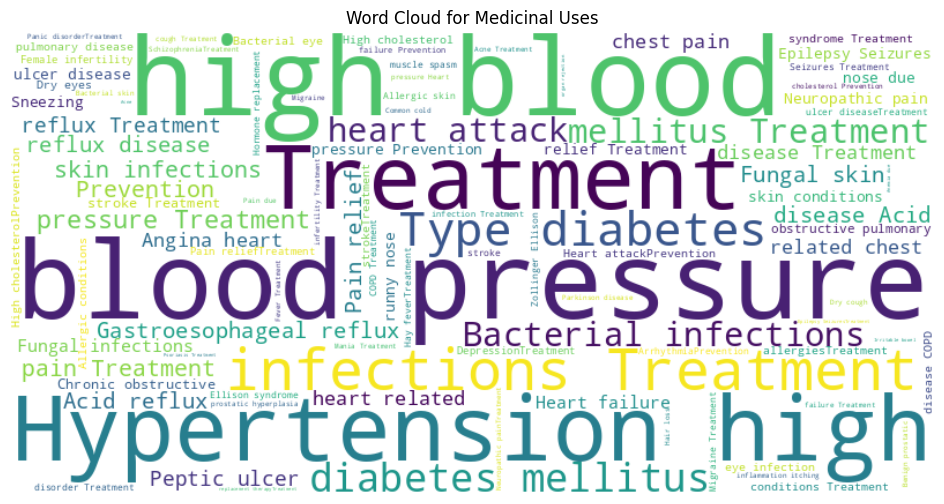

In [ ]:
from wordcloud import WordCloud

# Combine all Uses text
uses_text = ' '.join(data['Uses'])

# Generate a word cloud for Uses
wordcloud_uses = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(uses_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_uses, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Medicinal Uses')
plt.show()


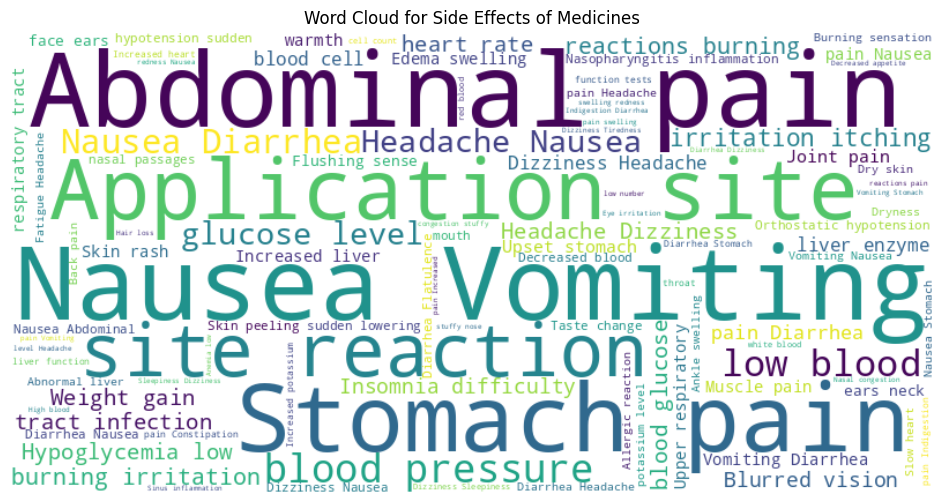

In [ ]:
from wordcloud import WordCloud

# Combine all Side Effects text
side_effects_text = ' '.join(data['Side_effects'])

# Generate a word cloud for Side Effects
wordcloud_side_effects = WordCloud(background_color='white', width=800, height=400, max_words=100).generate(side_effects_text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_side_effects, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Side Effects of Medicines')
plt.show()


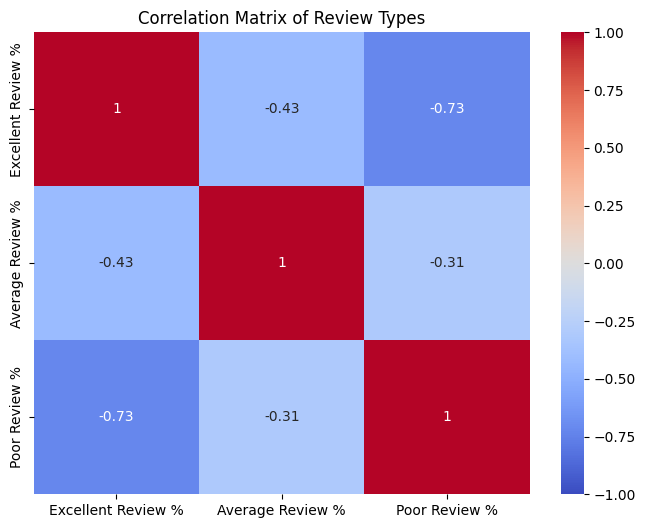

In [ ]:
# Generate a correlation matrix for Excellent, Average, and Poor Reviews
correlation_matrix = data[['Excellent Review %', 'Average Review %', 'Poor Review %']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix of Review Types')
plt.show()


In [ ]:
pip install pytesseract pillow

In [ ]:
import pytesseract
from PIL import Image



In [ ]:

# Install tesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
def extract_text_from_image(image_path):
    # Open the image file
    img = Image.open(image_path)

    # Use pytesseract to do OCR on the image
    text = pytesseract.image_to_string(img)

    return text

# Example usage
image_path = '/content/Pparacetamol.jpg'  # Replace with the actual path to your image
extracted_text = extract_text_from_image(image_path)

print(extracted_text)

  

 

 

NSS

 

 

Perccstamol Tablets IP (coma)

PARACIP-500 ‘aférc-s00

: Each uncoated tablet contains
” Paracetamol IP ... 00 mg

¢
sion, [ ferro “or nae Pn oh doe a coe wt |
lo semage ot ctarge e0:ons (6 9. neon of ne foe,
Crt, cut o brerting. ehing O(N,
arklod by CLALTO.

See xd ans Poh
Cipla Cape ase ang it Po
oe nok

| | PARACIP-500

 

 

 

Dosage: Adults: 500 mg to 1000 mg (110 2
fablets) upto « maximum of 4000 mg dally in
divided doses of as directed by the physician.
Protect from light

ML. 106/UA/2007

Mid by: HSN International,

Pict no, 54-86, Sector -6A, SIDCUL,

Haridwar (Uttarakhand)

uate - 500

 

Paracetamol fab
PARACIP-

Each uncoated tablet contains
Paracetamol |P_ 500 mg

 

 

 

 

 

5 Ween cA
Operon Pou Bushes Pk.
Cipla & Slee i oP

PARACIP-500

 

pts (50
O00 aa

Dosage: Adults: 500
tablets) upto a max
divided doses oF as
Protect trom ight

M.L. 106/UA/2007
Mid by: HSN intemat
Plot no. 54-86, Se

Haridwar (Uttara

wake

  

 



In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
csv_file_path = '/content/Medicine_).csv'
df = pd.read_csv(csv_file_path)

# OCR output
ocr_output = extracted_text

ocr_words = ocr_output.split()

# Extract the medicine names from the first column of the DataFrame
medicine_names = df[df.columns[0]]

# Find medicine names that match any word in the OCR output
matching_medicines = medicine_names[medicine_names.str.lower().isin(ocr_word.lower() for ocr_word in ocr_words)]

# Print the matching medicine names without empty lists
matching_medicines_list = matching_medicines.tolist()
if any(matching_medicines_list):
    print("Matching Medicine Names:")
    print(matching_medicines_list)
else:
    print("No matching medicine names found.")
input_string =matching_medicines_list

# Split the string into words
words = input_string

# Print each word
for word in words:
    print(word)


Matching Medicine Names:
['paracetamol']
paracetamol


In [ ]:




# Define a function to search for medicine details
def search_medicine(medicine_name):
    if medicine_name in data['Medicine Name'].tolist():
        # Get the medicine index
        medicine_index = data['Medicine Name'].tolist().index(medicine_name)

        # Extract medicine details
        composition = data['Composition'].iloc[medicine_index]
        uses = data['Uses'].iloc[medicine_index]
        side_effects = data['Side_effects'].iloc[medicine_index]
        image_url = data['Image URL'].iloc[medicine_index]
        manufacturer = data['Manufacturer'].iloc[medicine_index]
        excellent_review_pct = data['Excellent Review %'].iloc[medicine_index]
        average_review_pct = data['Average Review %'].iloc[medicine_index]
        poor_review_pct = data['Poor Review %'].iloc[medicine_index]

        # Print medicine details
        print(f"Medicine Name: {medicine_name}")
        print(f"Composition: {composition}")
        print(f"Uses: {uses}")
        print(f"Side Effects: {side_effects}")
        print(f"Image URL: {image_url}")
        print(f"Manufacturer: {manufacturer}")
        print(f"Excellent Reviews (%): {excellent_review_pct}")
        print(f"Average Reviews (%): {average_review_pct}")
        print(f"Poor Reviews (%): {poor_review_pct}")
    else:
        print(f"Medicine '{medicine_name}' not found.")

# Get the medicine name from the user
medicine_name = word

# Search for medicine details and display them
search_medicine(medicine_name)


Medicine Name: paracetamol
Composition: magnesium stearate +calcium stearate
Uses: help treat pain and reduce a high temperature (fever)
Side Effects: your lips, mouth, throat or tongue suddenly become swollen,you're breathing very fast or struggling to breathe,your throat feels tight or you're struggling to swallow
Image URL: nan
Manufacturer: Sri Krishna Pharmaceuticals Ltd (SKPL)
Excellent Reviews (%): 67
Average Reviews (%): 13
Poor Reviews (%): 20
